In [1]:
import os, sys
from pathlib import Path

sys.path.append(str(Path.cwd().resolve().parent))

from preprocess import VN30, preprocess_v1
from sklearn.preprocessing import StandardScaler

# Bước 1: Tiền xử lý dữ liệu

In [5]:
# Tất cả mã chứng khoán đều nằm trong VN30
# for code in VN30:
# 	print(code)

# Bước 2: Huấn luyện mô hình

* ElasticNet (lag = 30, 7 flags)
* Multi-task ElasticNet (lag = 30, 7 flags)

In [9]:
R2_dict = {}
for code in VN30:
    R2_dict[code] = []

def eval(code: str,
    calender_feature=False,
    rolling_feature=False,
    technical_feature=False,
    non_linear_feature=False,
    autocorr_feature=False,
    trend_feature=False,
):
    # Chuẩn bị dữ liệu
    scaler = StandardScaler()
    data = preprocess_v1(
        code,
        val=0.0,
        verbose=True,
        calendar_feature=calender_feature,
        rolling_feature=rolling_feature,
        technical_feature=technical_feature,
        nonlinear_feature = non_linear_feature,
        autocorr_feature=autocorr_feature,
        trend_feature=trend_feature,
    )
    X_train, Y_train = data["train"]
    X_test, Y_test = data["test"]
    X_val, Y_val = data["val"]
    feature_sc = data["scaler"]["feature"]
    target_sc = data["scaler"]["target"]
    from sklearn.linear_model import MultiTaskElasticNet
    from sklearn.metrics import (
        r2_score,
    )
    
    model = MultiTaskElasticNet(
        random_state=42, l1_ratio=0.3, alpha=0.1, max_iter=50000
    )
    model.fit(X_train, Y_train)

    print("Evaluate on Train Set")
    Y_train_predicted = model.predict(X_train)
    Y_train_predicted = target_sc.inverse_transform(Y_train_predicted)
    Y_train = target_sc.inverse_transform(Y_train)
    train_r2 = r2_score(Y_train, Y_train_predicted)
    print(f"Train R2 Score: {train_r2}")
    print("--------------------------------")
    print("Evaluate on Test Set")
    Y_test_predicted = model.predict(X_test)
    Y_test_predicted = target_sc.inverse_transform(Y_test_predicted)
    Y_test = target_sc.inverse_transform(Y_test)
    r2 = r2_score(Y_test, Y_test_predicted)
    print(f"Test R2 Score: {r2}")
   
    R2_dict[code].append(r2)
    

# Bước 3: Đánh giá mô hình

In [ ]:
for code in VN30:
    eval(
        code=code,
        calender_feature=True,
        rolling_feature=True,
        technical_feature=True,
        non_linear_feature=True,
        autocorr_feature=True,
        trend_feature=True,
    )

In [ ]:
R2_dict

In [ ]:
COLUMNS = [
    "no_feature",
    "+ calender_feature",
    "+ rolling_feature",
    "+ technical_feature",
    "+ non_linear_feature",
    "+ autocorr_feature",
    "+ trend_feature",
]
import pandas as pd
df = pd.DataFrame.from_dict(R2_dict, orient="index", columns=COLUMNS)
df.to_csv('multi_elastic.csv')


df.head()

,no_feature,+ calender_feature,+ rolling_feature,+ technical_feature,+ non_linear_feature,+ autocorr_feature,+ trend_feature
ACB,0.828053,0.828053,0.825703,0.854195,0.872954,0.872635,0.872636
BCM,0.902627,0.902627,0.898074,0.910472,0.927712,0.927834,0.927834
BID,0.874855,0.874853,0.876529,0.886403,0.909148,0.909288,0.909288
BVH,0.962608,0.962608,0.962460,0.968135,0.977005,0.977017,0.977017
CTG,0.939432,0.939432,0.939013,0.947170,0.954767,0.954799,0.954891


Load csv

In [77]:
def plot_df(df):
    import matplotlib.pyplot as plt

    rows, cols = 6, 5
    fig, axes = plt.subplots(rows, cols, figsize=(22, 20))

    for i, (idx, row) in enumerate(df.iterrows()):
        r = i // cols
        c = i % cols
        ax = axes[r, c]

        x = row.index

        y = row.values
        ax.plot(x, y, marker='o', color='steelblue', linewidth=2)
        ax.set_title(f"{idx}", fontsize=12)
        ax.set_ylabel("R²", fontsize=10)
        ax.set_ylim(y.min() - 0.001, y.max() + 0.001)
        ax.grid(True, linestyle="--", alpha=0.5)

        # Tô màu điểm cao nhất
        max_idx = y.argmax()
        ax.plot(x[max_idx], y[max_idx], marker='o', color='red', markersize=8)

        # Làm gọn trục x
        ax.tick_params(axis='x', labelrotation=45, labelsize=8)

    # Ẩn subplot dư nếu có
    for j in range(len(df), rows * cols):
        fig.delaxes(axes[j // cols, j % cols])

    plt.tight_layout()
    plt.show()


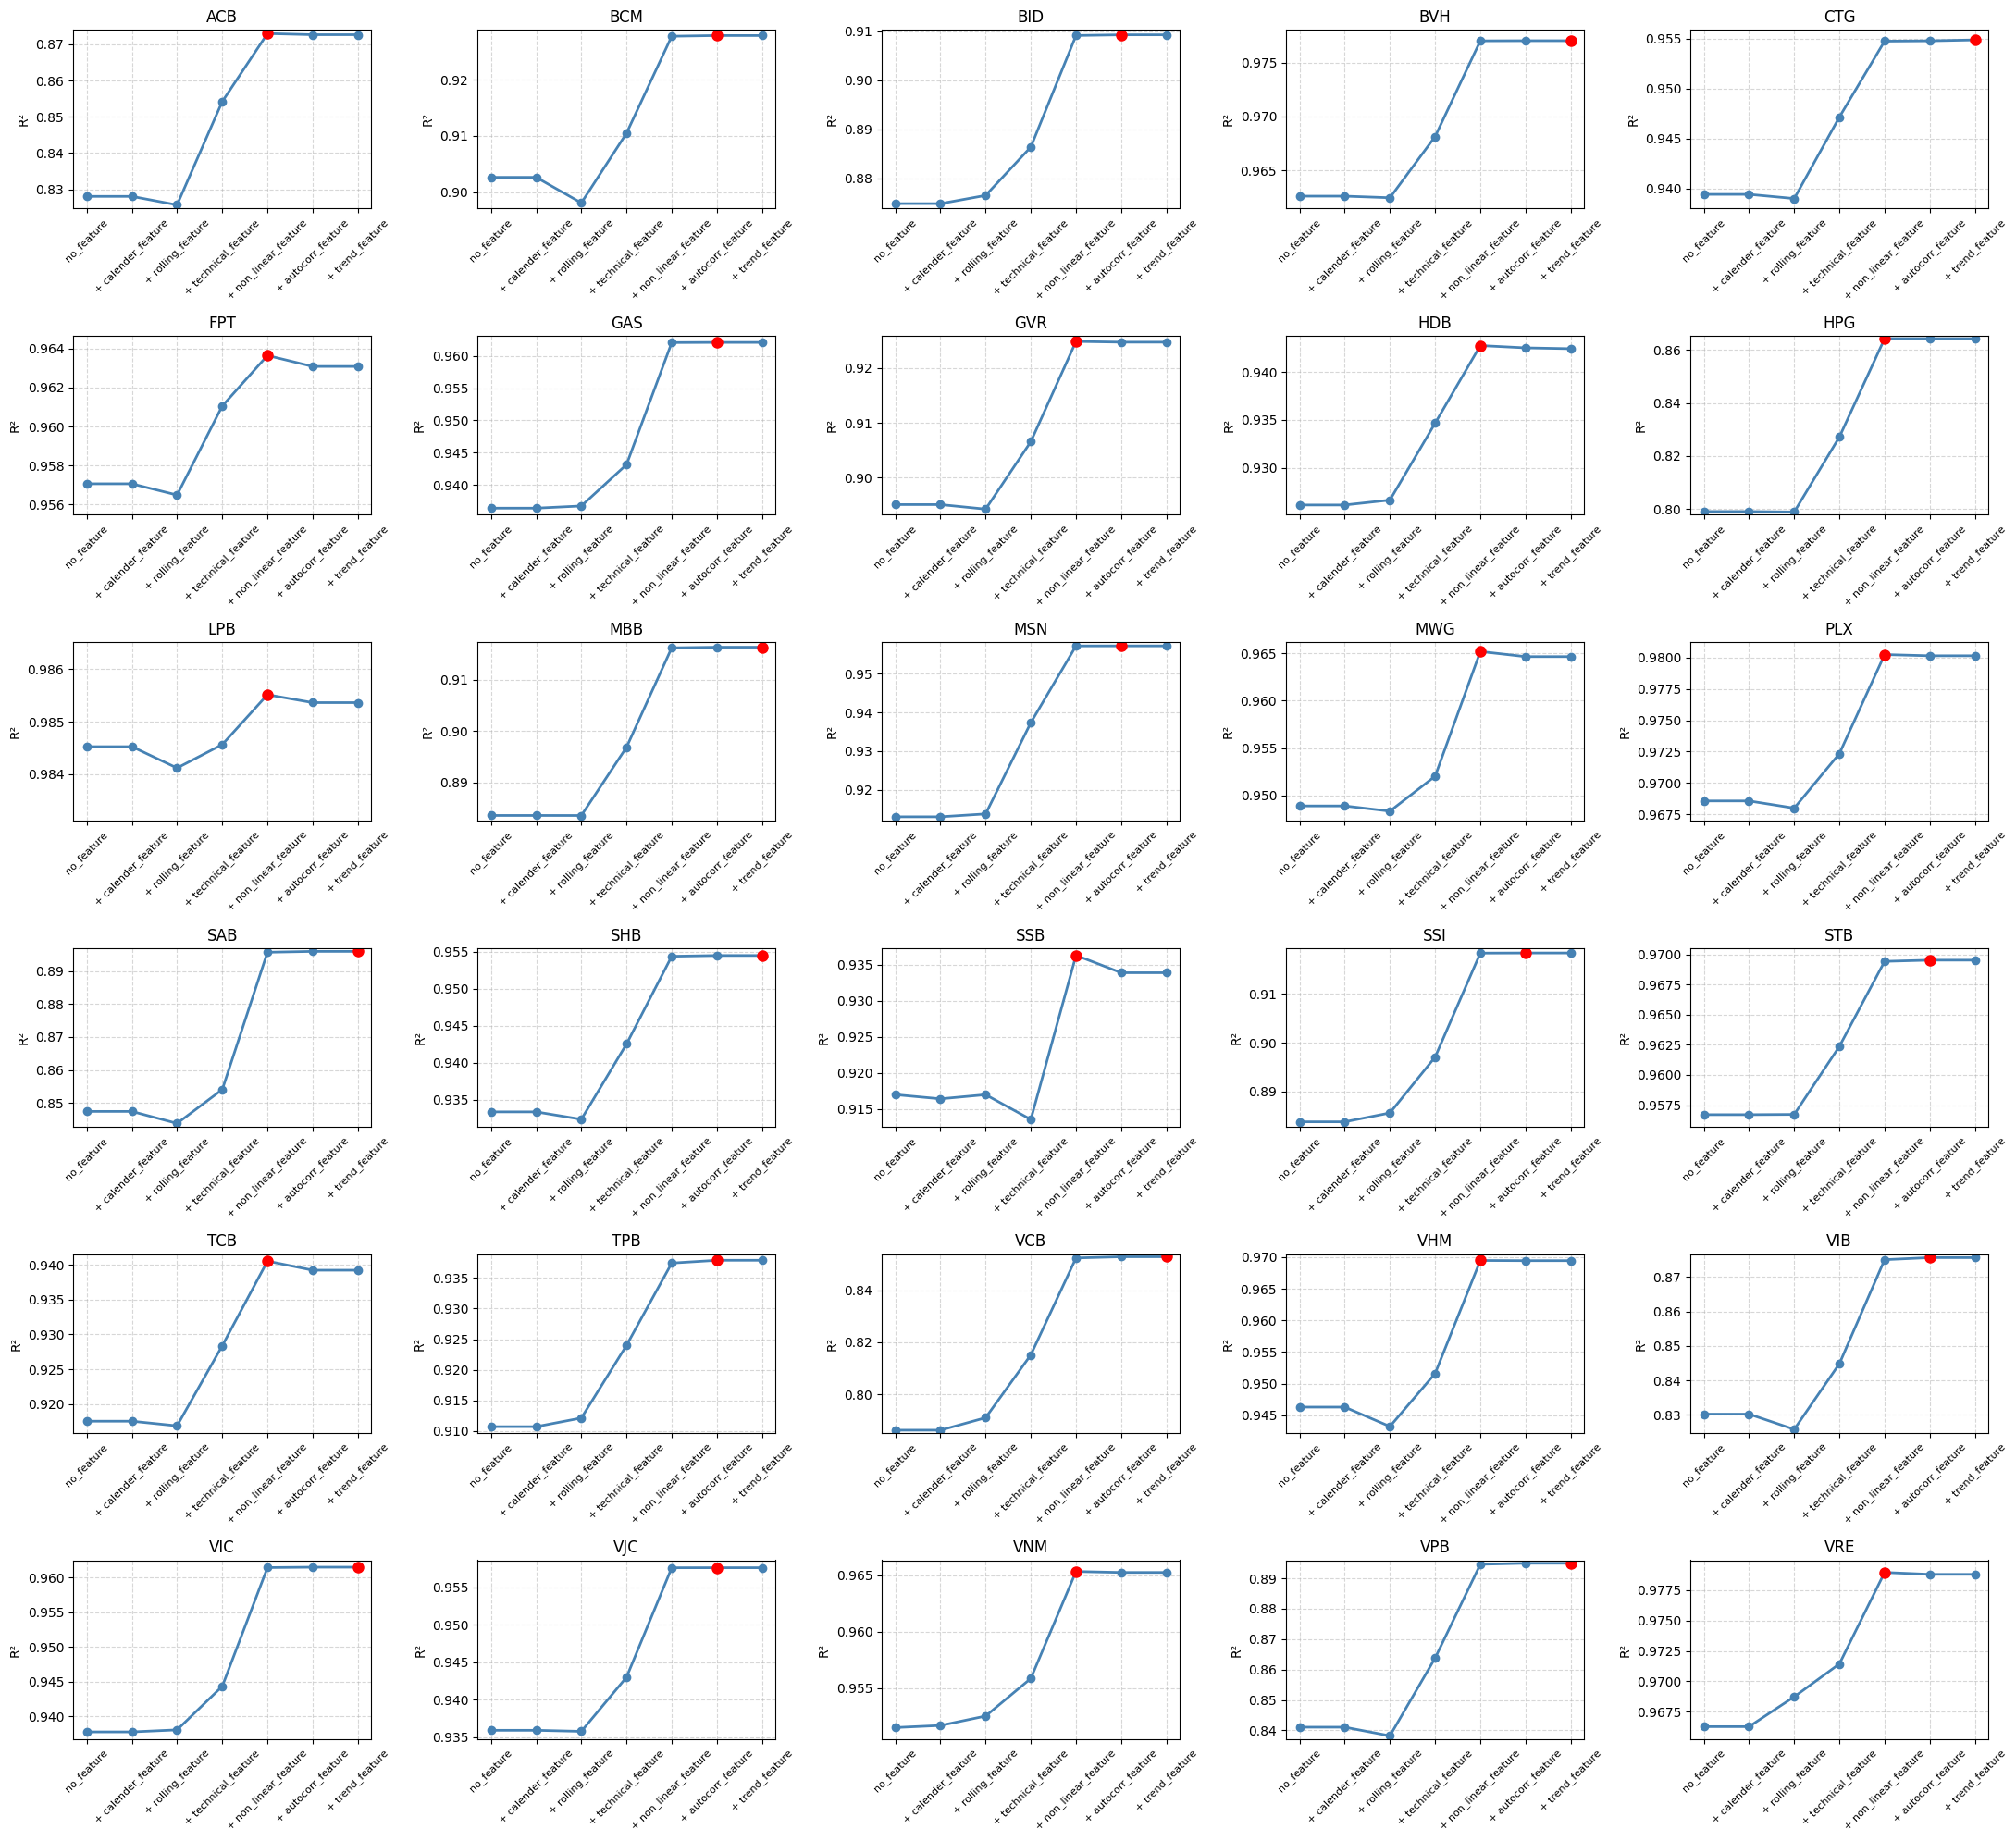

In [78]:
df_1 = pd.read_csv('multi_elastic.csv', index_col=0)
plot_df(df_1)

In [48]:
R2_dict_2 = {}
for code in VN30:
    R2_dict_2[code] = []

def eval_2(code: str,
    calender_feature=False,
    rolling_feature=False,
    technical_feature=False,
    non_linear_feature=False,
    autocorr_feature=False,
    trend_feature=False,
):
    # Chuẩn bị dữ liệu
    scaler = StandardScaler()
    data = preprocess_v1(
        code,
        val=0.0,
        verbose=True,
        calendar_feature=calender_feature,
        rolling_feature=rolling_feature,
        technical_feature=technical_feature,
        nonlinear_feature = non_linear_feature,
        autocorr_feature=autocorr_feature,
        trend_feature=trend_feature,
    )
    X_train, Y_train = data["train"]
    X_test, Y_test = data["test"]
    X_val, Y_val = data["val"]
    feature_sc = data["scaler"]["feature"]
    target_sc = data["scaler"]["target"]
    from sklearn.linear_model import ElasticNet
    from sklearn.metrics import (
        r2_score,
    )
    
    model = ElasticNet(
        random_state=42, l1_ratio=0.3, alpha=0.1, max_iter=50000
    )
    model.fit(X_train, Y_train)

    print("Evaluate on Train Set")
    Y_train_predicted = model.predict(X_train)
    Y_train_predicted = target_sc.inverse_transform(Y_train_predicted)
    Y_train = target_sc.inverse_transform(Y_train)
    train_r2 = r2_score(Y_train, Y_train_predicted)
    print(f"Train R2 Score: {train_r2}")
    print("--------------------------------")
    print("Evaluate on Test Set")
    Y_test_predicted = model.predict(X_test)
    Y_test_predicted = target_sc.inverse_transform(Y_test_predicted)
    Y_test = target_sc.inverse_transform(Y_test)
    r2 = r2_score(Y_test, Y_test_predicted)
    print(f"Test R2 Score: {r2}")
   
    R2_dict_2[code].append(r2)
    

In [55]:
for code in VN30:
    eval_2(
        code=code,
        calender_feature=True,
        rolling_feature=True,
        technical_feature=True,
        non_linear_feature=True,
        autocorr_feature=True,
        trend_feature=True,
    )

=== Preprocessing ACB ===
Train shape: (1213, 167), Val shape: (0, 167), Test shape: (296, 167)
Evaluate on Train Set
Train R2 Score: 0.9946688167004484
--------------------------------
Evaluate on Test Set
Test R2 Score: 0.775163060843539
=== Preprocessing BCM ===
Train shape: (1211, 167), Val shape: (0, 167), Test shape: (296, 167)
Evaluate on Train Set
Train R2 Score: 0.99394223495616
--------------------------------
Evaluate on Test Set
Test R2 Score: 0.9112852177352991
=== Preprocessing BID ===
Train shape: (1218, 167), Val shape: (0, 167), Test shape: (296, 167)
Evaluate on Train Set
Train R2 Score: 0.9887898625470226
--------------------------------
Evaluate on Test Set
Test R2 Score: 0.8666478979309307
=== Preprocessing BVH ===
Train shape: (1218, 167), Val shape: (0, 167), Test shape: (296, 167)
Evaluate on Train Set
Train R2 Score: 0.9901936933721869
--------------------------------
Evaluate on Test Set
Test R2 Score: 0.9734717294260331
=== Preprocessing CTG ===
Train shape: 

In [44]:
for code in VN30:
    R2_dict_2[code].pop(-1)

In [56]:
R2_dict_2

{'ACB': [0.7554238308504012,
  0.7554238308504012,
  0.7496218281731066,
  0.7595421577159236,
  0.775650536723116,
  0.775163060843539,
  0.775163060843539],
 'BCM': [0.8994521008089953,
  0.8994521008089953,
  0.8955668599207016,
  0.8990037853493568,
  0.9110496275424338,
  0.9112852177352991,
  0.9112852177352991],
 'BID': [0.835221954919446,
  0.835221954919446,
  0.8400653905725143,
  0.8453659154692552,
  0.8662201022948965,
  0.8666478979309307,
  0.8666478979309307],
 'BVH': [0.9615587193344186,
  0.9615587193344186,
  0.9612674745116219,
  0.964445861100417,
  0.9734821633031395,
  0.9734717294260331,
  0.9734717294260331],
 'CTG': [0.9220233243510363,
  0.9220233243510363,
  0.9218606612483196,
  0.9265572459746503,
  0.9339561592626805,
  0.9342900456550444,
  0.9342900456550444],
 'FPT': [0.9412629251041751,
  0.9412629251041751,
  0.9403860028296499,
  0.9425810920694904,
  0.9420706893546729,
  0.9412301883510533,
  0.9412301883510533],
 'GAS': [0.9364171694006129,
  0.9

In [57]:
COLUMNS = [
    "no_feature",
    "+ calender_feature",
    "+ rolling_feature",
    "+ technical_feature",
    "+ non_linear_feature",
    "+ autocorr_feature",
    "+ trend_feature",
]
import pandas as pd
df = pd.DataFrame.from_dict(R2_dict_2, orient="index", columns=COLUMNS)
df.to_csv('elastic.csv')


df.head()

,no_feature,+ calender_feature,+ rolling_feature,+ technical_feature,+ non_linear_feature,+ autocorr_feature,+ trend_feature
ACB,0.755424,0.755424,0.749622,0.759542,0.775651,0.775163,0.775163
BCM,0.899452,0.899452,0.895567,0.899004,0.911050,0.911285,0.911285
BID,0.835222,0.835222,0.840065,0.845366,0.866220,0.866648,0.866648
BVH,0.961559,0.961559,0.961267,0.964446,0.973482,0.973472,0.973472
CTG,0.922023,0.922023,0.921861,0.926557,0.933956,0.934290,0.934290


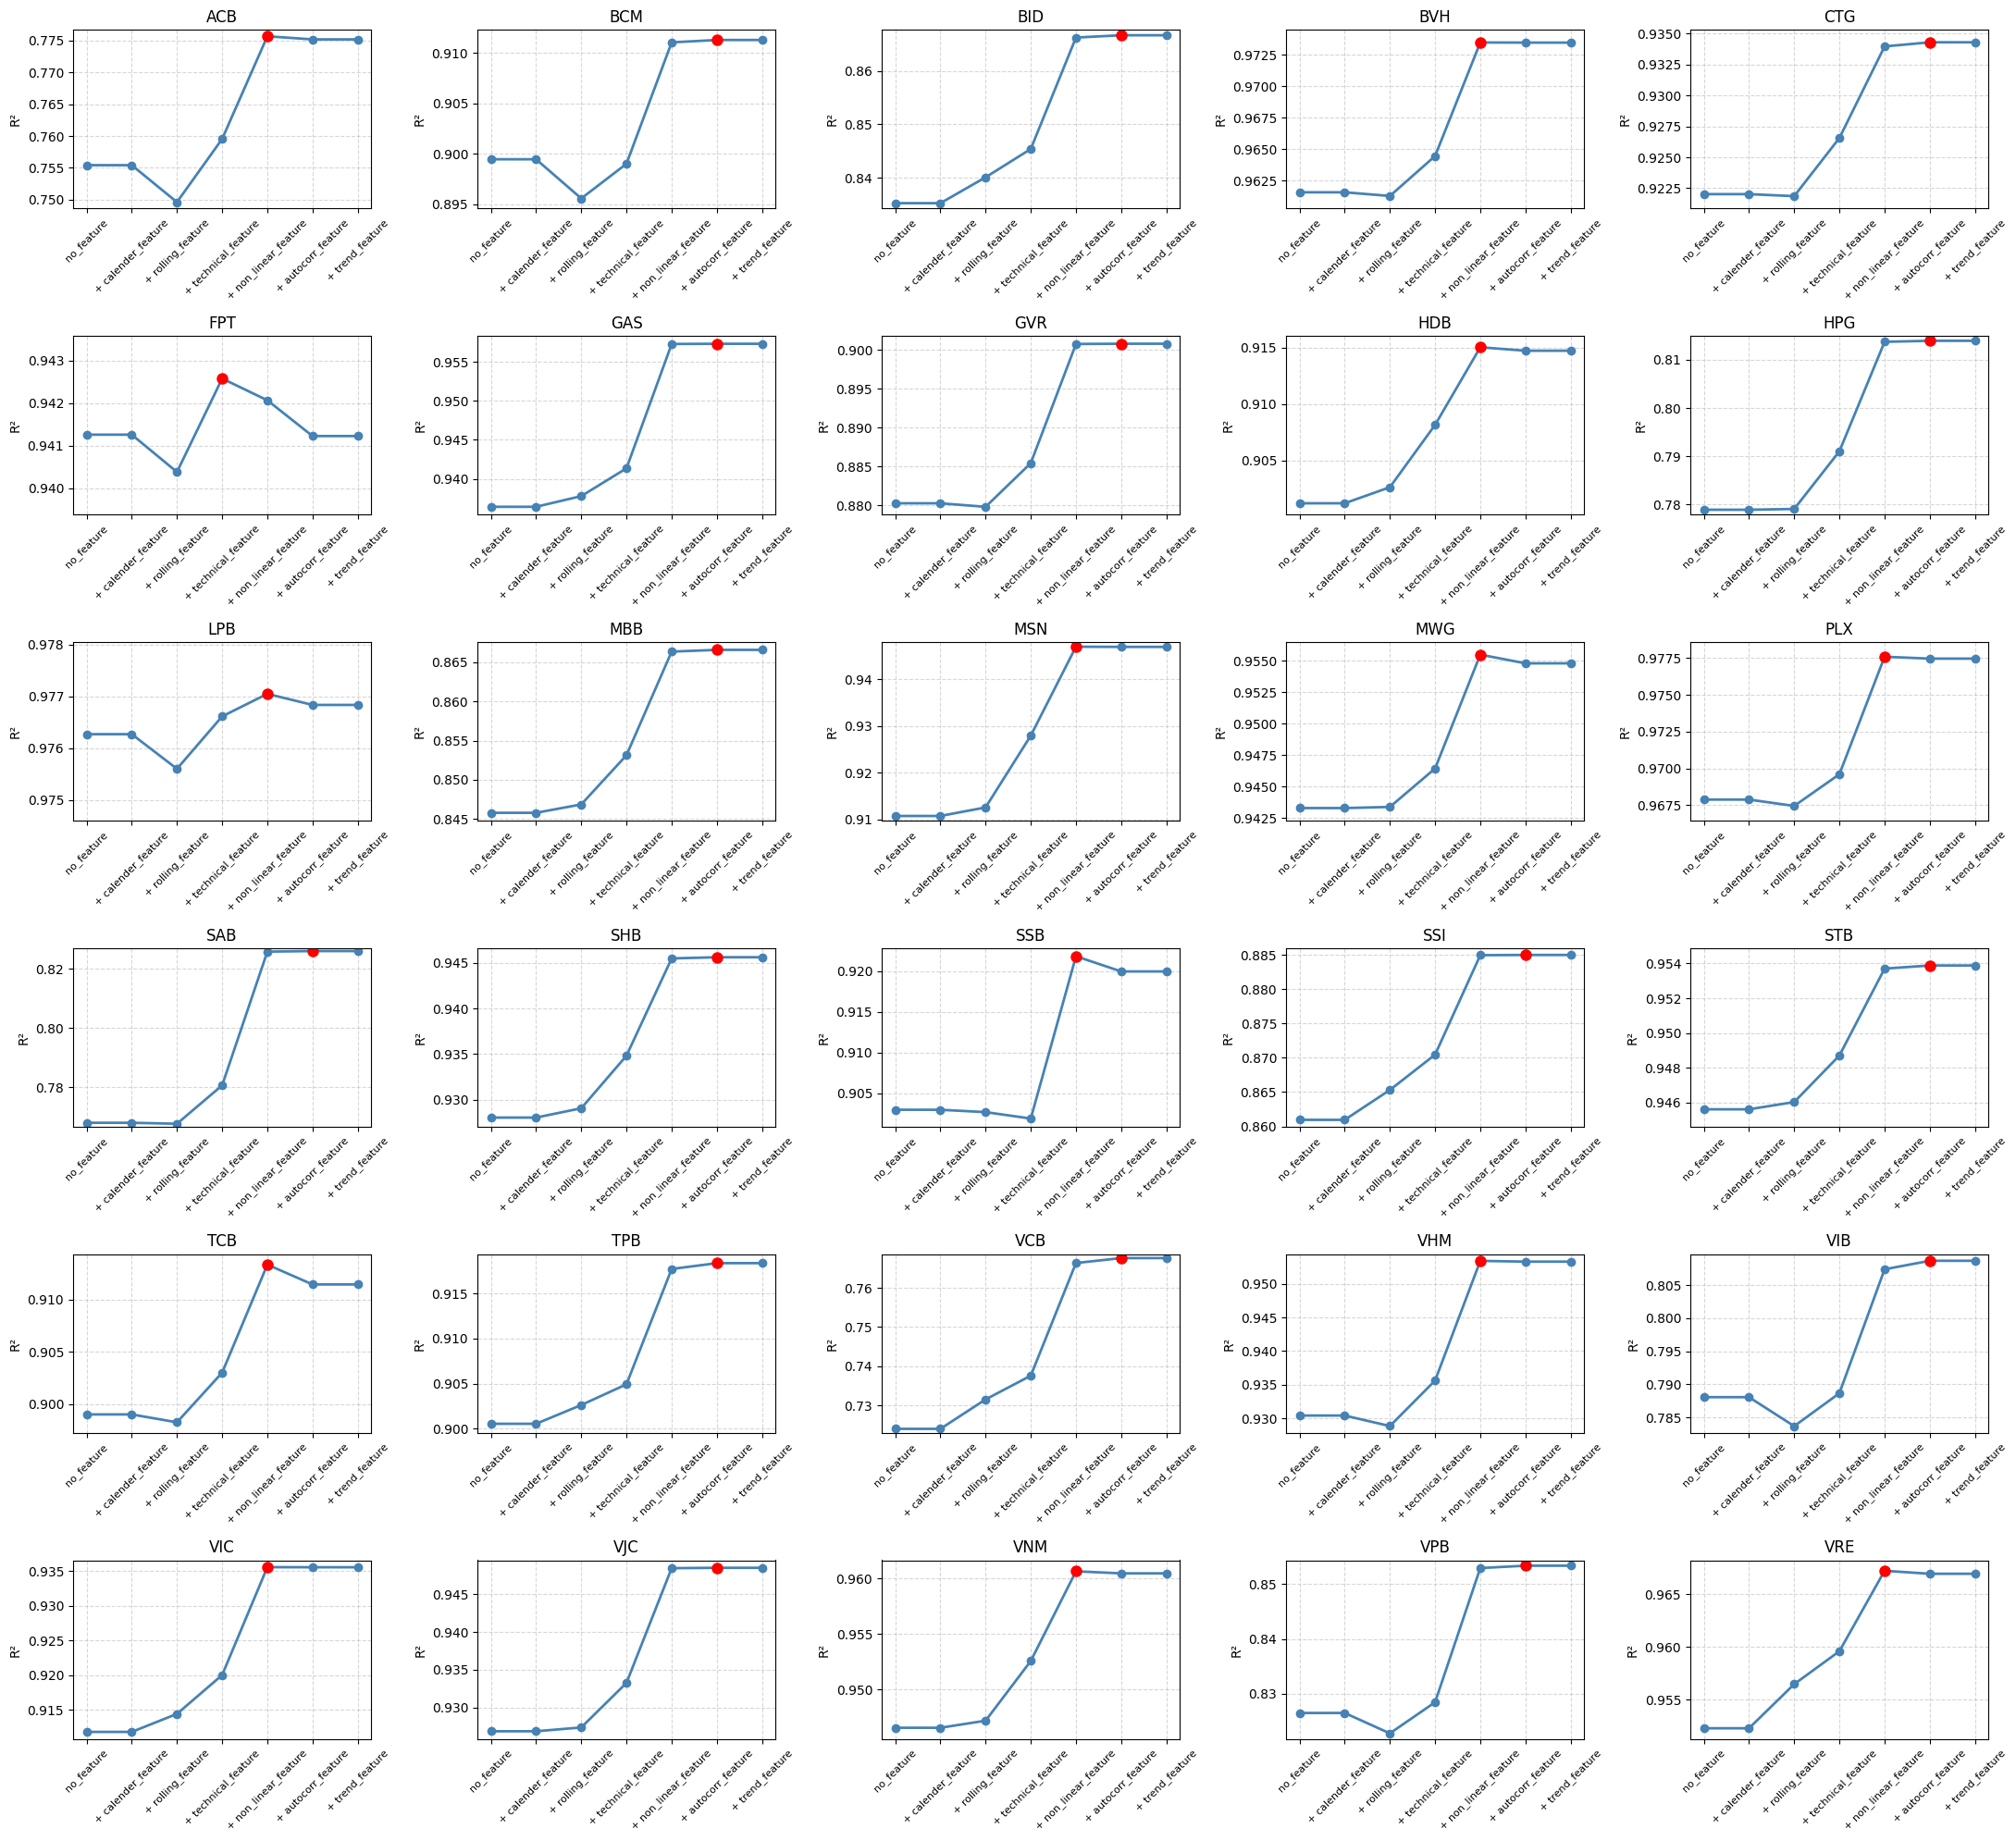

In [63]:
plot_df(df)

# Đánh giá toàn bộ dữ liệu

In [1]:
import pandas as pd
el_df = pd.read_csv('elastic.csv').round(2)
mul_df = pd.read_csv('multi_elastic.csv').round(2)
print(el_df)
print(mul_df)

   Unnamed: 0  no_feature  + calender_feature  + rolling_feature  \
0         ACB        0.76                0.76               0.75   
1         BCM        0.90                0.90               0.90   
2         BID        0.84                0.84               0.84   
3         BVH        0.96                0.96               0.96   
4         CTG        0.92                0.92               0.92   
5         FPT        0.94                0.94               0.94   
6         GAS        0.94                0.94               0.94   
7         GVR        0.88                0.88               0.88   
8         HDB        0.90                0.90               0.90   
9         HPG        0.78                0.78               0.78   
10        LPB        0.98                0.98               0.98   
11        MBB        0.85                0.85               0.85   
12        MSN        0.91                0.91               0.91   
13        MWG        0.94                0.94   

In [4]:
el_df.describe()
# mul_df.describe()

,no_feature,+ calender_feature,+ rolling_feature,+ technical_feature,+ non_linear_feature,+ autocorr_feature,+ trend_feature
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.889667,0.889667,0.889667,0.894667,0.909667,0.909000,0.909000
std,0.068405,0.068405,0.069306,0.066630,0.060371,0.060078,0.060078
min,0.720000,0.720000,0.730000,0.740000,0.770000,0.770000,0.770000
25%,0.852500,0.852500,0.855000,0.855000,0.872500,0.872500,0.872500
50%,0.905000,0.905000,0.905000,0.915000,0.925000,0.925000,0.925000
75%,0.940000,0.940000,0.940000,0.940000,0.950000,0.950000,0.950000
max,0.980000,0.980000,0.980000,0.980000,0.980000,0.980000,0.980000
